In [1]:
import pandas as pd
import numpy as np
from math import log,sqrt
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
columns = ["feat1","feat2","feat3","target"]

In [3]:
df = pd.read_csv("a1_d2.csv", sep=',', header=None,
                     names=columns)
df.head(n=5)

,feat1,feat2,feat3,target
0,-6.672418,-1.206198,-1.081050,0
1,1.675598,0.614994,-0.971600,0
2,-4.039058,0.335102,0.544618,1
3,0.793526,-0.235277,0.551771,1
4,3.820273,-0.274691,0.454743,1


In [4]:
df.describe()

,feat1,feat2,feat3,target
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.162699,0.052964,0.002570,0.50000
std,3.012325,0.994853,1.051784,0.50025
min,-9.794328,-2.946732,-1.627253,0.00000
25%,-1.851837,-0.639598,-1.003386,0.00000
50%,0.252959,0.063701,-0.424821,0.50000
75%,2.177363,0.722395,1.036763,1.00000
max,9.256746,3.063029,2.059943,1.00000


In [5]:
pospoints =  []
negpoints = []
for i in range(len(df)):
    if(df.iloc[i][3]==1):
        pospoints.append([df.iloc[i][0],df.iloc[i][1], df.iloc[i][2]])
    else:
        negpoints.append([df.iloc[i][0],df.iloc[i][1], df.iloc[i][2]])
pospoints = np.array(pospoints)
negpoints = np.array(negpoints)

In [6]:
m1 = pospoints[0]
for i in range(1,len(pospoints)):
    m1 = np.add(m1,pospoints[i])
m2 = negpoints[0]
for i in range(1,len(negpoints)):
    m2 = np.add(m2,negpoints[i])
m1 = m1/len(pospoints)
m2 = m2/len(pospoints)
print(m1)
print(m2)
print(m1-m2)

[0.22310309 0.00255859 1.01027072]
[ 0.10229483  0.10337021 -1.00513   ]
[ 0.12080826 -0.10081162  2.01540072]


In [7]:
covpos = (pospoints-m1).T@(pospoints-m1)
covpos = covpos/len(pospoints)
covneg = (negpoints-m2).T@(negpoints-m2)
covneg = covneg/len(negpoints)
print(covpos)
print(covneg)
cov=np.add(covpos,covneg)
print(cov)
cov_inv = np.linalg.inv(cov)
print(cov_inv)

[[8.42751299 0.00950644 0.12580932]
 [0.00950644 0.99063298 0.02687313]
 [0.12580932 0.02687313 0.15394936]]
[[ 9.69524187e+00 -2.06707971e-01  1.18281053e-04]
 [-2.06707971e-01  9.81770141e-01 -1.09539524e-03]
 [ 1.18281053e-04 -1.09539524e-03  2.54181002e-02]]
[[18.12275486 -0.19720153  0.1259276 ]
 [-0.19720153  1.97240312  0.02577773]
 [ 0.1259276   0.02577773  0.17936747]]
[[ 0.05552224  0.00607198 -0.03985285]
 [ 0.00607198  0.50861384 -0.07735819]
 [-0.03985285 -0.07735819  5.61424388]]


In [8]:
w = cov_inv@(m1-m2)
w

array([-0.07422404, -0.20644839, 11.31793517])

In [9]:
trans_pospoints = [w.T@pospoint for pospoint in pospoints]
trans_pospoints = sorted(trans_pospoints)
print("pospoints:",trans_pospoints)
print("\n")
print("\n")
print("\n")
print("\n")
trans_negpoints = [w.T@negpoint for negpoint in negpoints]
trans_negpoints = sorted(trans_negpoints)
print("negpoints:",trans_negpoints)

pospoints: [-4.367204057430377, -0.48237009401487774, -0.32621678577439717, 0.007475257180668965, 0.563254026191828, 1.0295299340631379, 1.3014316078958716, 1.5477061187411174, 1.5796240889512296, 1.8285260143760615, 2.64918149814818, 2.654604215709508, 2.6625360169622017, 2.81316029988225, 2.9342403691898324, 2.960376715525001, 2.9625279250147396, 3.365548508250671, 3.4141425250070427, 3.418413183469493, 3.5226790915894353, 3.6040017025471873, 3.6208403417848265, 3.8758601766027545, 3.8811992739185275, 4.087609807133433, 4.243672996603821, 4.393604716394907, 4.671475587991396, 4.686030655503006, 4.716950785017932, 4.80295783188096, 4.827285529272195, 4.8644253959091905, 4.919909456502022, 4.978243928796635, 5.063968513459522, 5.084824840502192, 5.2232176868612585, 5.281011791822482, 5.357983789345109, 5.381283364221533, 5.436175148631902, 5.524547628959575, 5.526233748572652, 5.705000136625275, 5.708245794963762, 5.710146766740742, 5.740311712296501, 5.812070048680365, 5.8282683521265

In [10]:
pos_mean = np.mean(trans_pospoints)
neg_mean = np.mean(trans_negpoints)
print(pos_mean, neg_mean)

11.41709067532392 -11.404929485402137


In [11]:
pos_std = np.std(trans_pospoints)
neg_std = np.std(trans_negpoints)
print(pos_std, neg_std)

4.412734934755475 1.8302433052232812


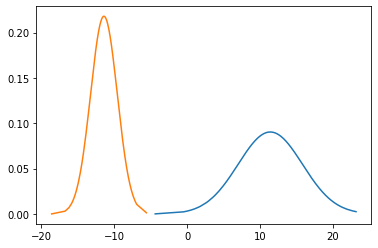

In [12]:
plt.plot(trans_pospoints,norm.pdf(trans_pospoints,pos_mean,pos_std))
plt.plot(trans_negpoints,norm.pdf(trans_negpoints,neg_mean,neg_std))
plt.show()

In [13]:
a = pos_std**2 - neg_std**2
b = -2*((pos_std**2)*neg_mean - (neg_std**2)*pos_mean)
c = (pos_std**2)*(neg_mean**2) - (neg_std**2)*(pos_mean**2) - 2*(pos_std**2)*(neg_std**2)*log(pos_std/neg_std)
print(a,b,c)

16.122439048096766 520.64853617332 1981.3478407719647


In [14]:
point1 = (-b+sqrt(b**2-4*a*c))/(2*a)
point2 = (-b-sqrt(b**2-4*a*c))/(2*a)
print(point1, point2)

-4.4069315647339335 -27.886478546485062


In [15]:
if(abs((pos_mean+neg_mean)/2-point1) < abs((pos_mean+neg_mean)/2-point2)):
    cutpoint = point1
else:
    cutpoint = point2
cutpoint

-4.4069315647339335

In [16]:
a=0
b=0
c=0
d=0
for testpoint in pospoints:
    if(w.T@testpoint>=cutpoint):
        a=a+1
    else:
        b=b+1
for testpoint in negpoints:
    if(w.T@testpoint<cutpoint):
        c=c+1
    else:
        d=d+1
print(a,b,c,d)

500 0 500 0


In [17]:
accuracy = (a+c)/(a+b+c+d)
print("accuracy:", accuracy)

accuracy: 1.0


In [18]:
precision = a/(a+d)
recall = a/(a+b)
f_score = 2 * precision * recall / (precision + recall)
print("f_score:", f_score)

f_score: 1.0


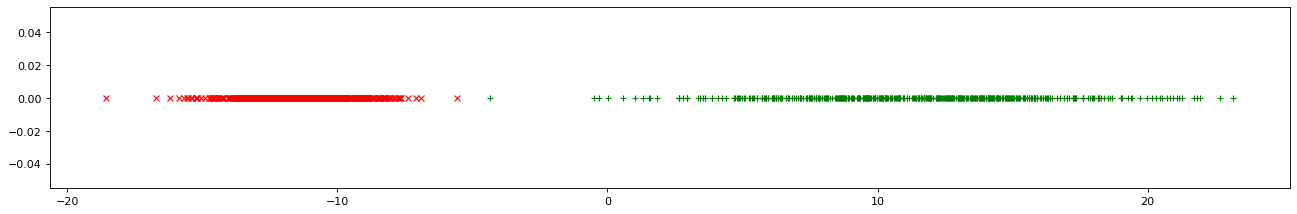

In [19]:
plt.figure(num=None, figsize=(20, 3), dpi=80, facecolor='w', edgecolor='k')
ar = np.array(trans_pospoints) # just as an example array
ar2 = np.array(trans_negpoints)
plt.plot(ar, np.zeros_like(ar) , 'g+')
plt.plot(ar2, np.zeros_like(ar2) , 'rx')
plt.show()